In [48]:
import numpy as np
import pandas as pd

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn import preprocessing
import statsmodels.api as sm
import itertools

In [50]:
train = pd.read_csv("train_advanced.csv")
test = pd.read_csv("test_advanced.csv")
sample = pd.read_csv("sample_submission.csv")

In [51]:
len(sample)

92001

In [52]:
len(test)

92000

In [53]:
len(train)

821000

# Exploratory Data Analysis

In [54]:
train.head()

,Date,Store,Item,Sales,Average Rating,Location,Category,Branding
0,1/1/2017,KMart,1,13,2.8,Wheelers Hill VIC 3170,Electronics,Sony
1,1/2/2017,KMart,1,11,1.4,Wheelers Hill VIC 3170,Electronics,Sony
2,1/3/2017,KMart,1,14,1.8,Wheelers Hill VIC 3170,Electronics,Sony
3,1/4/2017,KMart,1,13,1.3,Wheelers Hill VIC 3170,Electronics,Sony
4,1/5/2017,KMart,1,10,2.9,Wheelers Hill VIC 3170,Electronics,Sony


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821000 entries, 0 to 820999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            821000 non-null  object 
 1   Store           821000 non-null  object 
 2   Item            821000 non-null  int64  
 3   Sales           821000 non-null  int64  
 4   Average Rating  821000 non-null  float64
 5   Location        820260 non-null  object 
 6   Category        821000 non-null  object 
 7   Branding        821000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 50.1+ MB


In [56]:
train['Location'].unique()

array(['Wheelers Hill VIC 3170', 'Preston,\xa0VIC,\xa03072',
       'South Melbourne,\xa0VIC\xa03205',
       'Keysborough, VIC, 3173, Australia', 'Mulgrave\xa0VIC\xa03170',
       'Dandenong, VIC, 3175, Australia',
       'Springvale, VIC, 3171, Australia', 'Ringwood VIC 3134',
       ' Epping VIC 3076', 'Mulgrave VIC 3170', nan], dtype=object)

In [57]:
def changeLoc(x,y,CHANGE):
    train["Location"].replace(CHANGE,(str(x)+", VIC, "+str(y)+", Australia"), 
           inplace=True)
changeLoc("Preston",3072,"Preston,\xa0VIC,\xa03072")
changeLoc("South Melbourne",3205,"South Melbourne,\xa0VIC\xa03205")
changeLoc("Mulgrave",3170,"Mulgrave\xa0VIC\xa03170")
changeLoc("Mulgrave",3170,"Mulgrave VIC 3170")
changeLoc("Epping",3076," Epping VIC 3076")
changeLoc("Ringwood",3134,"Ringwood VIC 3134")
changeLoc("Wheelers Hill",3170,"Wheelers Hill VIC 3170")
changeLoc("Mulgrave",3170,np.nan)

In [58]:
train['Location'].unique()

array(['Wheelers Hill, VIC, 3170, Australia',
       'Preston, VIC, 3072, Australia',
       'South Melbourne, VIC, 3205, Australia',
       'Keysborough, VIC, 3173, Australia',
       'Mulgrave, VIC, 3170, Australia',
       'Dandenong, VIC, 3175, Australia',
       'Springvale, VIC, 3171, Australia',
       'Ringwood, VIC, 3134, Australia', 'Epping, VIC, 3076, Australia'],
      dtype=object)

Date

In [59]:
train.Date=pd.to_datetime(train.Date,format='%m/%d/%Y')
train.Date.dtypes
train.Date.unique()

array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000', ...,
       '2021-06-28T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [60]:
train['year'] = pd.DatetimeIndex(train['Date']).year
train['month'] = pd.DatetimeIndex(train['Date']).month
train['day'] = pd.DatetimeIndex(train['Date']).day

In [61]:
len(train[train["year"]==2017])

182500

In [62]:
train.head()

,Date,Store,Item,Sales,Average Rating,Location,Category,Branding,year,month,day
0,2017-01-01,KMart,1,13,2.8,"Wheelers Hill, VIC, 3170, Australia",Electronics,Sony,2017,1,1
1,2017-01-02,KMart,1,11,1.4,"Wheelers Hill, VIC, 3170, Australia",Electronics,Sony,2017,1,2
2,2017-01-03,KMart,1,14,1.8,"Wheelers Hill, VIC, 3170, Australia",Electronics,Sony,2017,1,3
3,2017-01-04,KMart,1,13,1.3,"Wheelers Hill, VIC, 3170, Australia",Electronics,Sony,2017,1,4
4,2017-01-05,KMart,1,10,2.9,"Wheelers Hill, VIC, 3170, Australia",Electronics,Sony,2017,1,5


In [63]:
train_dummy=pd.get_dummies(train.Category,prefix="Category")
train=pd.concat([train,train_dummy],axis=1)
train=train.drop(columns=["Category"])

In [64]:
train_bdummy=pd.get_dummies(train.Branding,prefix="Branding")
train=pd.concat([train,train_bdummy],axis=1)
train=train.drop(columns=["Branding"])

In [65]:
train_storedummy=pd.get_dummies(train.Store,prefix="Store")
train=pd.concat([train,train_storedummy],axis=1)
train=train.drop(columns=["Store"])

In [66]:
train_locationdummy=pd.get_dummies(train.Location,prefix="Store")
train=pd.concat([train,train_locationdummy],axis=1)
train=train.drop(columns=["Location"])

In [46]:
train.head()

,Date,Item,Sales,Average Rating,year,month,day,Category_Clothing & Accessories,Category_Cosmetics,Category_Electronics,...,Store_Woolies,"Store_Dandenong, VIC, 3175, Australia","Store_Epping, VIC, 3076, Australia","Store_Keysborough, VIC, 3173, Australia","Store_Mulgrave, VIC, 3170, Australia","Store_Preston, VIC, 3072, Australia","Store_Ringwood, VIC, 3134, Australia","Store_South Melbourne, VIC, 3205, Australia","Store_Springvale, VIC, 3171, Australia","Store_Wheelers Hill, VIC, 3170, Australia"
0,2017-01-01,1,13,2.8,2017,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2017-01-02,1,11,1.4,2017,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2017-01-03,1,14,1.8,2017,1,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2017-01-04,1,13,1.3,2017,1,4,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2017-01-05,1,10,2.9,2017,1,5,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [70]:
train=train.set_index(["Date"])

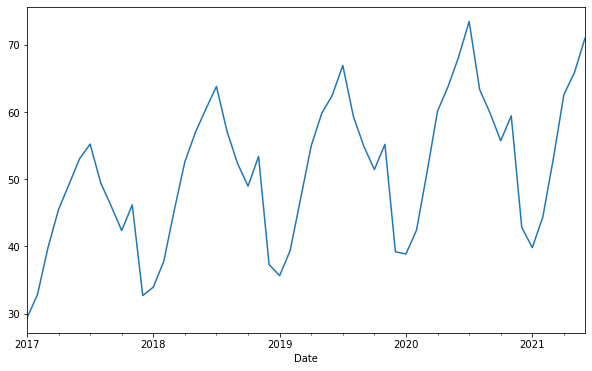

In [71]:
import seaborn as sns

train.Sales.resample('MS').mean().plot() # MS implies Month Starting

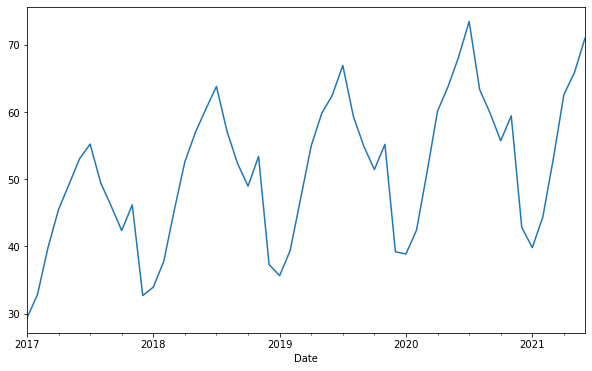

In [72]:
import seaborn as sns
y=train.Sales.resample('MS').mean()
train.Sales.resample('MS').mean().plot() # MS implies Month Starting

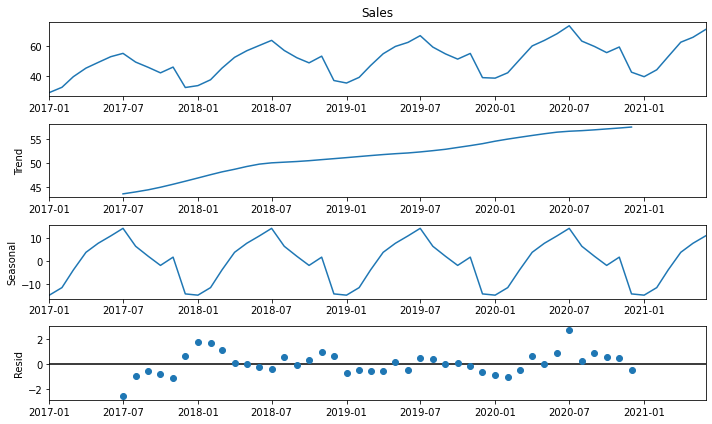

In [75]:
decomposition=sm.tsa.seasonal_decompose(y,model="additive")
fig=decomposition.plot()
plt.show()

In [76]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [77]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:572.4961269356305


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:448.7759765775293
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:242.15509366826987


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:781.4227587472128
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:188.116587329041
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:171.41995437361618
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:138.25478080444844
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:124.22585688982883
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:505.4810824838371


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:412.90960915773167
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:192.50482168262306


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1175.3112138438137


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:190.65937950587167


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:148.82747954193007
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:113.57568358198309
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:101.091839341052
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:347.23734257364634
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:245.49523468866826
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:126.83411435751998


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1327.4858978012753
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:123.3081253936823
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:122.02613356772113
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:87.68659119156746
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:86.67721230960719
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:340.2673154574675
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:239.32652279822324
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:126.31458514382177


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:728.7485387434868
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:124.09501952452223
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:119.70911559780289
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:86.32810642349621
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:81.2917089224536
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:355.0057944926135
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:279.44553977809556
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:130.05263160187187


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:793.4719418353682
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:122.7521182834831


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:125.07794362466848
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:89.18451967203268
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:90.22659225948529
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:348.9745027162051
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:273.55235983678415
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:129.67429725145666


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1193.0143658721438
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:124.20514541540582


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:124.64323867743693
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:88.1927530047292
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:85.22258941968133
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:346.11898925259953
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:245.10702061628643
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:128.76829258591687


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1304.6702269839857
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:122.21479104137217
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:121.48313961495745
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:84.42447560183518
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:86.23844645310051
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:341.39965780845523
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:241.18596674538338
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:127.64234782866619


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:621.2898280839103
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:124.15028911378195
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:121.4659690750221
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:90.03751261565463
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:88.21307126259373


In [78]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7990      0.254     -3.147      0.002      -1.297      -0.301
ma.L1          1.0000   6166.023      0.000      1.000   -1.21e+04    1.21e+04
ar.S.L12       0.0999      0.148      0.677      0.498      -0.189       0.389
sigma2         0.9765   6021.120      0.000      1.000   -1.18e+04    1.18e+04


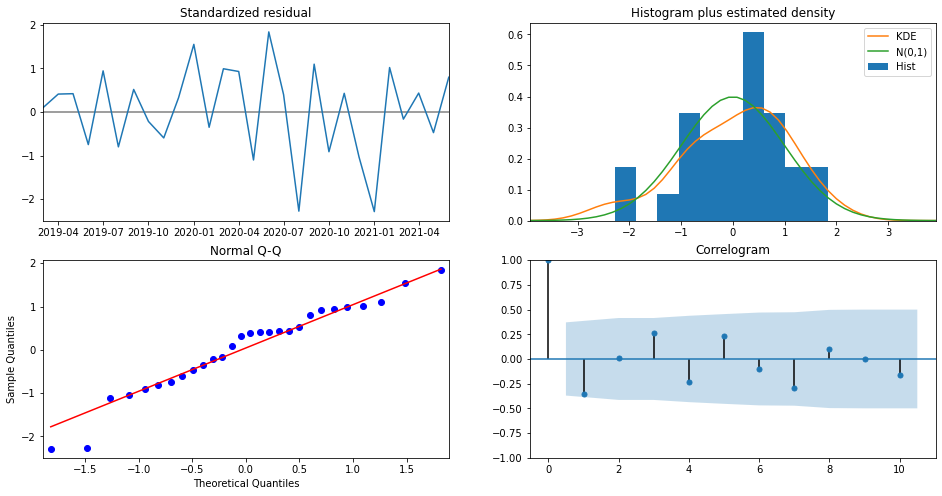

In [79]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [80]:
test.Date=pd.to_datetime(test.Date,format='%m/%d/%Y')
test.Date.dtypes
test.Date.unique()

array(['2021-07-01T00:00:00.000000000', '2021-07-02T00:00:00.000000000',
       '2021-07-03T00:00:00.000000000', '2021-07-04T00:00:00.000000000',
       '2021-07-05T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-07-07T00:00:00.000000000', '2021-07-08T00:00:00.000000000',
       '2021-07-09T00:00:00.000000000', '2021-07-10T00:00:00.000000000',
       '2021-07-11T00:00:00.000000000', '2021-07-12T00:00:00.000000000',
       '2021-07-13T00:00:00.000000000', '2021-07-14T00:00:00.000000000',
       '2021-07-15T00:00:00.000000000', '2021-07-16T00:00:00.000000000',
       '2021-07-17T00:00:00.000000000', '2021-07-18T00:00:00.000000000',
       '2021-07-19T00:00:00.000000000', '2021-07-20T00:00:00.000000000',
       '2021-07-21T00:00:00.000000000', '2021-07-22T00:00:00.000000000',
       '2021-07-23T00:00:00.000000000', '2021-07-24T00:00:00.000000000',
       '2021-07-25T00:00:00.000000000', '2021-07-26T00:00:00.000000000',
       '2021-07-27T00:00:00.000000000', '2021-07-28

In [ ]:
pred = results.get_prediction(test.Date, dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()